## 数据处理

### 导入走神司机数据集

In [1]:
from sklearn.datasets import load_files       
from keras.utils import np_utils
import numpy as np
from glob import glob

# 定义函数来加载train，test和validation数据集
def load_dataset(path):
    data = load_files(path)
    files = np.array(data['filenames'])
    targets = np_utils.to_categorical(np.array(data['target']), 10)
    return files, targets

c:\users\magicyang\appdata\local\continuum\anaconda3\envs\keras-tf\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
import pandas as pd
path = 'driver_imgs_list.csv'
df=pd.read_csv(path)

In [3]:
print (df)

      subject classname            img
0        p002        c0  img_44733.jpg
1        p002        c0  img_72999.jpg
2        p002        c0  img_25094.jpg
3        p002        c0  img_69092.jpg
4        p002        c0  img_92629.jpg
5        p002        c0   img_3370.jpg
6        p002        c0  img_67639.jpg
7        p002        c0  img_58560.jpg
8        p002        c0  img_35779.jpg
9        p002        c0  img_10012.jpg
10       p002        c0  img_70354.jpg
11       p002        c0  img_54617.jpg
12       p002        c0  img_26684.jpg
13       p002        c0  img_82409.jpg
14       p002        c0   img_5585.jpg
15       p002        c0  img_19029.jpg
16       p002        c0  img_40930.jpg
17       p002        c0  img_31547.jpg
18       p002        c0  img_87373.jpg
19       p002        c0  img_10627.jpg
20       p002        c0  img_66355.jpg
21       p002        c0  img_97714.jpg
22       p002        c0  img_37344.jpg
23       p002        c0  img_54848.jpg
24       p002        c0  

In [4]:
print (df.iloc[0])

subject               p002
classname               c0
img          img_44733.jpg
Name: 0, dtype: object


### 查看各分类的统计数据

In [5]:
catagorylist=['c0','c1','c2','c3','c4','c5','c6','c7','c8','c9']
catagorycount=[]
for index in range(10):
    catagorycount.append(len(df[df['classname']==catagorylist[index]]))
print (catagorycount)

[2489, 2267, 2317, 2346, 2326, 2312, 2325, 2002, 1911, 2129]


In [6]:
import matplotlib.pyplot as plt  
from pandas import DataFrame
catadf=DataFrame(catagorycount,index=catagorylist,columns=['catagory'])
catadf.plot(kind='bar')

### 生成司机列表

In [7]:
driver_list=[]
driver_list=[]
for content in range(df.shape[0]):
    subject=df.iloc[content]['subject']
    if (subject not in driver_list):
        driver_list.append(subject)
print (driver_list)    
print ('There are %d training drivers.' % len(driver_list))

['p002', 'p012', 'p014', 'p015', 'p016', 'p021', 'p022', 'p024', 'p026', 'p035', 'p039', 'p041', 'p042', 'p045', 'p047', 'p049', 'p050', 'p051', 'p052', 'p056', 'p061', 'p064', 'p066', 'p072', 'p075', 'p081']
There are 26 training drivers.


### 寻找包含所有分类的司机编号

In [8]:
containall_driverid=[]
for driverid in driver_list:
    isContain=True
    newdf=df[df['subject']==driverid]
    for cataindex in range(10):
        if len(newdf[newdf['classname']==catagorylist[index]])==0:
            isContain=False
    if isContain:
        containall_driverid.append(driverid)
print (containall_driverid)

['p002', 'p012', 'p014', 'p015', 'p016', 'p021', 'p022', 'p024', 'p026', 'p035', 'p039', 'p041', 'p042', 'p045', 'p047', 'p049', 'p050', 'p051', 'p052', 'p056', 'p061', 'p064', 'p066', 'p072', 'p075', 'p081']


### 采样图例

In [61]:
sampleimagelist=[]
sampleimagefile=[]
sampledriver=containall_driverid[0]
print (sampledriver)
sampledf=df[df['subject']==sampledriver]
for cataindex in range(10):
    for content in range(sampledf.shape[0]):
        if sampledf.iloc[content]['classname']==catagorylist[cataindex]:
            file='imgs/train'+'/'+df.iloc[content]['classname']+'/'+df.iloc[content]['img']
            sampleimagefile.append(file)
            break
print (sampleimagefile)
    

p002
['imgs/train/c0/img_44733.jpg', 'imgs/train/c1/img_16856.jpg', 'imgs/train/c2/img_42941.jpg', 'imgs/train/c3/img_46464.jpg', 'imgs/train/c4/img_48852.jpg', 'imgs/train/c5/img_78551.jpg', 'imgs/train/c6/img_45361.jpg', 'imgs/train/c7/img_56899.jpg', 'imgs/train/c8/img_99437.jpg', 'imgs/train/c9/img_9877.jpg']


### 展示采样图例

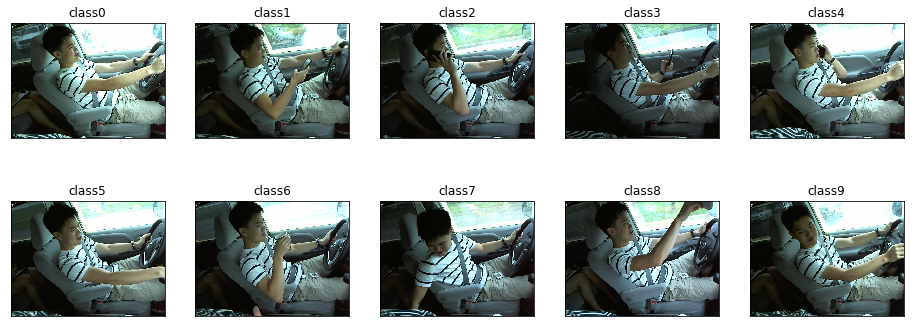

In [62]:
import cv2  
fig,axes=plt.subplots(2,5,figsize = (16,6))
for index in range(10):
    x=int(index/5)
    y=index-x*5
    file=sampleimagefile[index]
    img = cv2.imread(file)
    # 将BGR图像转变为RGB图像以打印
    cv_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    axes[x,y].set_xticks([])
    axes[x,y].set_yticks([])
    title='class'+str(index)
    axes[x,y].set_title(title)
    # 展示图像
    axes[x,y].imshow(cv_rgb)

### 生成训练列表和预测

In [5]:
train_input=[]
target_input=[]
for content in range(df.shape[0]):
    file='imgs/train'+'/'+df.iloc[content]['classname']+'/'+df.iloc[content]['img']
    train_input.append(file)
    target_input.append(int(df.iloc[content]['classname'][1:]))
targets = np_utils.to_categorical(np.array(target_input), 10)
train_files = np.array(train_input)
print (train_files[0])
print (targets[0])

imgs/train/c0/img_44733.jpg
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [6]:
print (train_files[10000])
print (targets[10000])

imgs/train/c8/img_30792.jpg
[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]


## 预处理

先算一下全局的颜色均值


In [5]:
from keras.preprocessing import image  
input_shape=[299,299,3]
def path_to_tensor(img_path,shape):
    # 用PIL加载RGB图像为PIL.Image.Image类型
    img = image.load_img(img_path, target_size=(shape[0], shape[1]))
    # 将PIL.Image.Image类型转化为格式为(224, 224, 3)的3维张量
    x = image.img_to_array(img)
    # 将3维张量转化为格式为(1, 224, 224, 3)的4维张量并返回
    return  np.array(np.expand_dims(x, axis=0),dtype=np.float32)

输入预处理

In [6]:
from keras.applications.xception import preprocess_input
def preprocess(tensor):
    return preprocess_input(tensor)

返回预处理后的特征

In [7]:
from tqdm import tqdm
def paths_to_tensor(img_paths):
    list_of_tensors = [np.array(preprocess(path_to_tensor(img_path,input_shape)),dtype=np.float16) for img_path in tqdm(img_paths)]
    return np.vstack(list_of_tensors)

## 构建训练模型

### 根据司机划分数据集

In [11]:
print (driver_list)

['p002', 'p012', 'p014', 'p015', 'p016', 'p021', 'p022', 'p024', 'p026', 'p035', 'p039', 'p041', 'p042', 'p045', 'p047', 'p049', 'p050', 'p051', 'p052', 'p056', 'p061', 'p064', 'p066', 'p072', 'p075', 'p081']


根据司机划分数据集，获得训练数据


In [12]:
def getIndexsByDriver(driver):
    indexs=[index for index in range(df.shape[0]) if df.iloc[index]['subject'] in driver]
    return indexs

In [13]:
def getFeatureAndTargetByDriver(driver,files,targets):
    indexs=[index for index in range(df.shape[0]) if df.iloc[index]['subject'] in driver]
    filelists=[files[index] for index in indexs]
    features=np.array(paths_to_tensor(filelists))
    returntargets=np.array([targets[index] for index in indexs])
    return features,returntargets

### 完善模型

In [8]:
from keras.applications.xception import Xception
from keras.applications.vgg16 import VGG16
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D
from keras.layers import Dropout, Flatten, Dense,Activation
from keras.models import Sequential
from keras.layers.normalization import BatchNormalization
from keras.layers import Input
from keras.optimizers import Adam
from keras.optimizers import SGD
from keras.models import Model
def train_model(shape=[299,299,3]):
    #vgg16 = VGG16(weights=None, input_shape=(224, 224, 3), include_top=False)
    inputmode = Xception(weights='imagenet', input_shape=shape, include_top=False)
    inputcontent = Input(shape)
    x = inputmode(inputcontent)
    #x = vgg16(inputcontent)
    # Code above loads pre-trained data and
    x = GlobalAveragePooling2D()(x)
    #x=Flatten()(x)
    #x=Dense(4096, activation='relu')(x)
    #x=Dropout(0.5)(x)
    #x=Dense(4096, activation='relu')(x)
    # BN
    #x = BatchNormalization(epsilon=1e-06, momentum=0.9, weights=None)(x)
    #X = Dropout(0.2)(x)
    x = Dense(10, activation='softmax')(x)
    model = Model(inputcontent, x)
    ## 编译模型
    opt=Adam(lr=0.0001, beta_1=0.9, beta_2=0.999, epsilon=1e-08)
    #opt = SGD(lr=0.001, decay=1e-6, momentum=0.9, nesterov=True)
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    return model
    

In [15]:
summarymodel=train_model()
print (summarymodel.summary())
del (summarymodel)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 299, 299, 3)       0         
_________________________________________________________________
xception (Model)             (None, 10, 10, 2048)      20861480  
_________________________________________________________________
global_average_pooling2d_1 ( (None, 2048)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                20490     
Total params: 20,881,970
Trainable params: 20,827,442
Non-trainable params: 54,528
_________________________________________________________________
None


### 根据司机ID，FKOLD切分训练集和验证集

In [16]:
from keras.callbacks import ModelCheckpoint
from sklearn.utils import shuffle
from sklearn.model_selection import KFold
nfolds=10
kf = KFold(n_splits=nfolds,shuffle=True,random_state=0)
kfsplit=kf.split(driver_list)




### 训练模型

In [17]:
## 训练模型
from keras.callbacks import ModelCheckpoint
from keras.callbacks import EarlyStopping
num_fold = 0
for train_drivers_index, valid_drivers_index in kfsplit:
    num_fold += 1
    print('Start KFold number {} from {}'.format(num_fold, nfolds))
    train_drivers=[driver_list[index] for index in train_drivers_index]
    valid_drivers=[driver_list[index] for index in valid_drivers_index]
    print (train_drivers)
    print (valid_drivers)
    kd_train_features,kd_train_targets=getFeatureAndTargetByDriver(train_drivers,train_files,targets)
    kd_valid_features,kd_valid_targets=getFeatureAndTargetByDriver(valid_drivers,train_files,targets)
    print (len(kd_train_features),len(kd_valid_features))
    save_file='weights.best.xception_'+str(num_fold)
    #打乱数据
    kd_train_features,kd_train_targets=shuffle(kd_train_features,kd_train_targets)
    kd_valid_features,kd_valid_targets=shuffle(kd_valid_features,kd_valid_targets)
    checkpointer = ModelCheckpoint(filepath=save_file, 
                               verbose=1, save_best_only=True)
    earlystop=EarlyStopping(monitor='val_loss', patience=2, verbose=0)
    model=train_model()
    model.fit(kd_train_features, kd_train_targets, 
          validation_data=(kd_valid_features, kd_valid_targets),
          epochs=10, batch_size=32, callbacks=[earlystop,checkpointer], verbose=1)
    del (kd_train_features,kd_train_targets,kd_valid_features,kd_valid_targets,model)

Start KFold number 1 from 10
['p002', 'p012', 'p015', 'p016', 'p021', 'p022', 'p024', 'p026', 'p035', 'p039', 'p041', 'p042', 'p045', 'p049', 'p050', 'p051', 'p052', 'p056', 'p064', 'p066', 'p072', 'p075', 'p081']
['p014', 'p047', 'p061']


  8%|▊         | 1557/19904 [00:09<01:57, 155.95it/s]/home/ubuntu/anaconda3/lib/python3.6/site-packages/tqdm/_monitor.py:89: TqdmSynchronisationWarning: Set changed size during iteration (see https://github.com/tqdm/tqdm/issues/481)
  TqdmSynchronisationWarning)
100%|██████████| 2520/2520 [00:16<00:00, 157.21it/s]


19904 2520
Train on 19904 samples, validate on 2520 samples
Epoch 1/10
19904/19904 [==============================] - 270s 14ms/step - loss: 0.1744 - acc: 0.9549 - val_loss: 0.3119 - val_acc: 0.8964

Epoch 00001: val_loss improved from inf to 0.31193, saving model to weights.best.xception_1
Epoch 2/10
19904/19904 [==============================] - 261s 13ms/step - loss: 0.0085 - acc: 0.9981 - val_loss: 0.2823 - val_acc: 0.9095

Epoch 00002: val_loss improved from 0.31193 to 0.28232, saving model to weights.best.xception_1
Epoch 3/10
19904/19904 [==============================] - 254s 13ms/step - loss: 0.0090 - acc: 0.9977 - val_loss: 0.3673 - val_acc: 0.9091

Epoch 00003: val_loss did not improve from 0.28232
Epoch 4/10
19904/19904 [==============================] - 254s 13ms/step - loss: 0.0047 - acc: 0.9987 - val_loss: 0.3628 - val_acc: 0.9103

Epoch 00004: val_loss did not improve from 0.28232
Start KFold number 2 from 10
['p002', 'p012', 'p014', 'p015', 'p016', 'p022', 'p024', 'p02

100%|██████████| 2762/2762 [00:17<00:00, 156.74it/s]


19662 2762
Train on 19662 samples, validate on 2762 samples
Epoch 1/10
19662/19662 [==============================] - 259s 13ms/step - loss: 0.1753 - acc: 0.9567 - val_loss: 0.2407 - val_acc: 0.9461

Epoch 00001: val_loss improved from inf to 0.24071, saving model to weights.best.xception_2
Epoch 2/10
19662/19662 [==============================] - 249s 13ms/step - loss: 0.0104 - acc: 0.9969 - val_loss: 0.3588 - val_acc: 0.9229

Epoch 00002: val_loss did not improve from 0.24071
Epoch 3/10
19662/19662 [==============================] - 249s 13ms/step - loss: 0.0065 - acc: 0.9984 - val_loss: 0.3068 - val_acc: 0.9236

Epoch 00003: val_loss did not improve from 0.24071
Start KFold number 3 from 10
['p002', 'p012', 'p014', 'p015', 'p016', 'p021', 'p022', 'p024', 'p026', 'p035', 'p039', 'p041', 'p042', 'p047', 'p049', 'p050', 'p051', 'p056', 'p061', 'p064', 'p072', 'p075', 'p081']
['p045', 'p052', 'p066']


100%|██████████| 2498/2498 [00:15<00:00, 157.36it/s]


19926 2498
Train on 19926 samples, validate on 2498 samples
Epoch 1/10
19926/19926 [==============================] - 267s 13ms/step - loss: 0.1728 - acc: 0.9595 - val_loss: 0.4067 - val_acc: 0.8827

Epoch 00001: val_loss improved from inf to 0.40673, saving model to weights.best.xception_3
Epoch 2/10
19926/19926 [==============================] - 256s 13ms/step - loss: 0.0104 - acc: 0.9977 - val_loss: 0.2601 - val_acc: 0.9135

Epoch 00002: val_loss improved from 0.40673 to 0.26009, saving model to weights.best.xception_3
Epoch 3/10
19926/19926 [==============================] - 256s 13ms/step - loss: 0.0053 - acc: 0.9988 - val_loss: 0.4785 - val_acc: 0.8699

Epoch 00003: val_loss did not improve from 0.26009
Epoch 4/10
19926/19926 [==============================] - 256s 13ms/step - loss: 0.0064 - acc: 0.9987 - val_loss: 0.2517 - val_acc: 0.9211

Epoch 00004: val_loss improved from 0.26009 to 0.25174, saving model to weights.best.xception_3
Epoch 5/10
19926/19926 [=====================

100%|██████████| 2407/2407 [00:15<00:00, 156.00it/s]


20017 2407
Train on 20017 samples, validate on 2407 samples
Epoch 1/10
20017/20017 [==============================] - 261s 13ms/step - loss: 0.1667 - acc: 0.9600 - val_loss: 0.4756 - val_acc: 0.8421

Epoch 00001: val_loss improved from inf to 0.47559, saving model to weights.best.xception_4
Epoch 2/10
20017/20017 [==============================] - 247s 12ms/step - loss: 0.0069 - acc: 0.9983 - val_loss: 0.5353 - val_acc: 0.8330

Epoch 00002: val_loss did not improve from 0.47559
Epoch 3/10
20017/20017 [==============================] - 247s 12ms/step - loss: 0.0084 - acc: 0.9979 - val_loss: 0.5653 - val_acc: 0.8430

Epoch 00003: val_loss did not improve from 0.47559
Start KFold number 5 from 10
['p002', 'p012', 'p014', 'p015', 'p016', 'p021', 'p022', 'p024', 'p026', 'p035', 'p041', 'p042', 'p045', 'p047', 'p049', 'p050', 'p051', 'p052', 'p056', 'p061', 'p064', 'p066', 'p072']
['p039', 'p075', 'p081']


100%|██████████| 2288/2288 [00:14<00:00, 154.49it/s]


20136 2288
Train on 20136 samples, validate on 2288 samples
Epoch 1/10
20136/20136 [==============================] - 276s 14ms/step - loss: 0.1744 - acc: 0.9563 - val_loss: 0.3079 - val_acc: 0.9047

Epoch 00001: val_loss improved from inf to 0.30786, saving model to weights.best.xception_5
Epoch 2/10
20136/20136 [==============================] - 261s 13ms/step - loss: 0.0090 - acc: 0.9982 - val_loss: 0.2829 - val_acc: 0.9100

Epoch 00002: val_loss improved from 0.30786 to 0.28293, saving model to weights.best.xception_5
Epoch 3/10
20136/20136 [==============================] - 261s 13ms/step - loss: 0.0063 - acc: 0.9987 - val_loss: 0.3912 - val_acc: 0.8846

Epoch 00003: val_loss did not improve from 0.28293
Epoch 4/10
20136/20136 [==============================] - 261s 13ms/step - loss: 0.0067 - acc: 0.9981 - val_loss: 0.3611 - val_acc: 0.9069

Epoch 00004: val_loss did not improve from 0.28293
Start KFold number 6 from 10
['p002', 'p012', 'p014', 'p015', 'p021', 'p024', 'p035', 'p03

100%|██████████| 3507/3507 [00:22<00:00, 156.84it/s]


18917 3507
Train on 18917 samples, validate on 3507 samples
Epoch 1/10
18917/18917 [==============================] - 262s 14ms/step - loss: 0.1809 - acc: 0.9550 - val_loss: 0.2232 - val_acc: 0.9450

Epoch 00001: val_loss improved from inf to 0.22323, saving model to weights.best.xception_6
Epoch 2/10
18917/18917 [==============================] - 245s 13ms/step - loss: 0.0070 - acc: 0.9985 - val_loss: 0.2151 - val_acc: 0.9487

Epoch 00002: val_loss improved from 0.22323 to 0.21514, saving model to weights.best.xception_6
Epoch 3/10
18917/18917 [==============================] - 245s 13ms/step - loss: 0.0098 - acc: 0.9979 - val_loss: 0.2615 - val_acc: 0.9167

Epoch 00003: val_loss did not improve from 0.21514
Epoch 4/10
18917/18917 [==============================] - 245s 13ms/step - loss: 0.0104 - acc: 0.9976 - val_loss: 0.1886 - val_acc: 0.9344

Epoch 00004: val_loss improved from 0.21514 to 0.18862, saving model to weights.best.xception_6
Epoch 5/10
18917/18917 [=====================

100%|██████████| 2074/2074 [00:13<00:00, 158.04it/s]


20350 2074
Train on 20350 samples, validate on 2074 samples
Epoch 1/10
20350/20350 [==============================] - 275s 14ms/step - loss: 0.1771 - acc: 0.9552 - val_loss: 0.3313 - val_acc: 0.8848

Epoch 00001: val_loss improved from inf to 0.33129, saving model to weights.best.xception_7
Epoch 2/10
20350/20350 [==============================] - 256s 13ms/step - loss: 0.0095 - acc: 0.9978 - val_loss: 0.4844 - val_acc: 0.8563

Epoch 00002: val_loss did not improve from 0.33129
Epoch 3/10
20350/20350 [==============================] - 256s 13ms/step - loss: 0.0106 - acc: 0.9975 - val_loss: 0.6697 - val_acc: 0.8886

Epoch 00003: val_loss did not improve from 0.33129
Start KFold number 8 from 10
['p002', 'p012', 'p014', 'p016', 'p021', 'p022', 'p024', 'p026', 'p035', 'p039', 'p041', 'p042', 'p045', 'p047', 'p049', 'p050', 'p051', 'p052', 'p056', 'p061', 'p064', 'p066', 'p075', 'p081']
['p015', 'p072']


100%|██████████| 1221/1221 [00:07<00:00, 157.40it/s]


21203 1221
Train on 21203 samples, validate on 1221 samples
Epoch 1/10
21203/21203 [==============================] - 284s 13ms/step - loss: 0.1628 - acc: 0.9605 - val_loss: 0.8814 - val_acc: 0.7142

Epoch 00001: val_loss improved from inf to 0.88138, saving model to weights.best.xception_8
Epoch 2/10
21203/21203 [==============================] - 262s 12ms/step - loss: 0.0096 - acc: 0.9981 - val_loss: 0.8240 - val_acc: 0.7396

Epoch 00002: val_loss improved from 0.88138 to 0.82399, saving model to weights.best.xception_8
Epoch 3/10
21203/21203 [==============================] - 262s 12ms/step - loss: 0.0044 - acc: 0.9991 - val_loss: 0.9930 - val_acc: 0.7551

Epoch 00003: val_loss did not improve from 0.82399
Epoch 4/10
21203/21203 [==============================] - 262s 12ms/step - loss: 6.1493e-04 - acc: 1.0000 - val_loss: 0.9796 - val_acc: 0.7625

Epoch 00004: val_loss did not improve from 0.82399
Start KFold number 9 from 10
['p012', 'p014', 'p015', 'p016', 'p021', 'p022', 'p024', 

100%|██████████| 1545/1545 [00:09<00:00, 160.06it/s]


20879 1545
Train on 20879 samples, validate on 1545 samples
Epoch 1/10
20879/20879 [==============================] - 280s 13ms/step - loss: 0.1672 - acc: 0.9587 - val_loss: 0.5933 - val_acc: 0.8369

Epoch 00001: val_loss improved from inf to 0.59331, saving model to weights.best.xception_9
Epoch 2/10
20879/20879 [==============================] - 260s 12ms/step - loss: 0.0113 - acc: 0.9973 - val_loss: 0.3973 - val_acc: 0.8757

Epoch 00002: val_loss improved from 0.59331 to 0.39726, saving model to weights.best.xception_9
Epoch 3/10
20879/20879 [==============================] - 260s 12ms/step - loss: 0.0080 - acc: 0.9975 - val_loss: 0.5910 - val_acc: 0.8615

Epoch 00003: val_loss did not improve from 0.39726
Epoch 4/10
20879/20879 [==============================] - 260s 12ms/step - loss: 0.0052 - acc: 0.9989 - val_loss: 0.4892 - val_acc: 0.8783

Epoch 00004: val_loss did not improve from 0.39726
Start KFold number 10 from 10
['p002', 'p012', 'p014', 'p015', 'p016', 'p021', 'p022', 'p0

100%|██████████| 1602/1602 [00:10<00:00, 157.23it/s]


20822 1602
Train on 20822 samples, validate on 1602 samples
Epoch 1/10
20822/20822 [==============================] - 283s 14ms/step - loss: 0.1758 - acc: 0.9586 - val_loss: 0.1097 - val_acc: 0.9644

Epoch 00001: val_loss improved from inf to 0.10970, saving model to weights.best.xception_10
Epoch 2/10
20822/20822 [==============================] - 255s 12ms/step - loss: 0.0068 - acc: 0.9984 - val_loss: 0.0908 - val_acc: 0.9657

Epoch 00002: val_loss improved from 0.10970 to 0.09084, saving model to weights.best.xception_10
Epoch 3/10
20822/20822 [==============================] - 255s 12ms/step - loss: 0.0104 - acc: 0.9972 - val_loss: 0.1495 - val_acc: 0.9551

Epoch 00003: val_loss did not improve from 0.09084
Epoch 4/10
20822/20822 [==============================] - 255s 12ms/step - loss: 0.0073 - acc: 0.9983 - val_loss: 0.1762 - val_acc: 0.9469

Epoch 00004: val_loss did not improve from 0.09084


## 计算测试集准确率

### 真实测试数据

In [9]:
# 加载测试列表
real_test_files = sorted(glob("imgs/test/*"))
print (len(real_test_files))

79726


In [10]:
print (real_test_files[0:5])

['imgs/test\\img_1.jpg', 'imgs/test\\img_10.jpg', 'imgs/test\\img_100.jpg', 'imgs/test\\img_1000.jpg', 'imgs/test\\img_100000.jpg']


In [11]:
def read_model(foldindex):
    model=train_model()
    save_file='weights.best.xception_'+str(foldindex+1)
    model.load_weights(save_file)
    return model

### PREDICT计算平均值

In [21]:
def get_predict_mean(data, nfolds):
    a = np.array(data[0])
    for i in range(1, nfolds):
        a += np.array(data[i])
    a /= nfolds
    return a.tolist()

In [24]:
def getRealPredict(startindex,endindex):
    print (startindex,endindex)
    filelists=real_test_files[startindex:endindex]
    features=np.array(paths_to_tensor(filelists))
    predict=[]
    for loop in range(nfolds):
        print ("loop: %d" %loop)
        model=read_model(loop)
        prediction = model.predict(features, batch_size=64, verbose=1)
        predict.append(prediction)
        del(model)
    kf_predict= get_predict_mean(predict,nfolds)
    return kf_predict

In [28]:
real_predict=[]
#每次算10000条数据，避免内存溢出
maxnum=40000
loop=int((len(real_test_files)-1)/maxnum)+1
print (loop)
for i in range(loop):
    print (i)
    start=i*maxnum
    end=(i+1)*maxnum
    if (end>len(real_test_files)):
        end=len(real_test_files)
    real_predict.append(getRealPredict(start,end))
print (len(real_predict))

  0%|          | 16/40000 [00:00<04:14, 157.22it/s]

2
0
0 40000


  4%|▍         | 1572/40000 [00:09<04:02, 158.68it/s]/home/ubuntu/anaconda3/lib/python3.6/site-packages/tqdm/_monitor.py:89: TqdmSynchronisationWarning: Set changed size during iteration (see https://github.com/tqdm/tqdm/issues/481)
  TqdmSynchronisationWarning)
100%|██████████| 40000/40000 [04:48<00:00, 138.74it/s]


loop: 0
40000/40000 [==============================] - 221s 6ms/step
loop: 1
40000/40000 [==============================] - 223s 6ms/step
loop: 2
40000/40000 [==============================] - 223s 6ms/step
loop: 3
40000/40000 [==============================] - 226s 6ms/step
loop: 4
40000/40000 [==============================] - 226s 6ms/step
loop: 5
40000/40000 [==============================] - 228s 6ms/step
loop: 6
40000/40000 [==============================] - 229s 6ms/step
loop: 7
40000/40000 [==============================] - 231s 6ms/step
loop: 8
40000/40000 [==============================] - 232s 6ms/step
loop: 9
40000/40000 [==============================] - 234s 6ms/step


  0%|          | 14/39726 [00:00<04:57, 133.61it/s]

1
40000 79726


100%|██████████| 39726/39726 [04:56<00:00, 133.78it/s]


loop: 0
39726/39726 [==============================] - 234s 6ms/step
loop: 1
39726/39726 [==============================] - 237s 6ms/step
loop: 2
39726/39726 [==============================] - 237s 6ms/step
loop: 3
39726/39726 [==============================] - 239s 6ms/step
loop: 4
39726/39726 [==============================] - 240s 6ms/step
loop: 5
39726/39726 [==============================] - 243s 6ms/step
loop: 6
39726/39726 [==============================] - 244s 6ms/step
loop: 7
39726/39726 [==============================] - 246s 6ms/step
loop: 8
39726/39726 [==============================] - 250s 6ms/step
loop: 9
39726/39726 [==============================] - 250s 6ms/step
2


### 记录数据并保存文件

In [29]:
result=[]
for i in range(loop):
    start=i*maxnum
    end=(i+1)*maxnum
    if (end>len(real_test_files)):
        end=len(real_test_files)
    for j in range(end-start):
        result.append(real_predict[i][j])
print (len(result))

79726


In [30]:
from pandas import DataFrame
indexlist=['c0','c1','c2','c3','c4','c5','c6','c7','c8','c9']
resultdf=DataFrame(result,columns=indexlist)

In [31]:
imglists=[imgfile[10:] for imgfile in real_test_files]
resultdf.insert(0,'img',imglists)

In [32]:
print (resultdf)

                  img        c0        c1        c2        c3        c4  \
0           img_1.jpg  0.002086  0.000230  0.000396  0.001641  0.000624   
1          img_10.jpg  0.006962  0.000287  0.000482  0.001136  0.002046   
2         img_100.jpg  0.687783  0.002488  0.002538  0.015253  0.002954   
3        img_1000.jpg  0.001383  0.000334  0.214389  0.000241  0.001672   
4      img_100000.jpg  0.000021  0.000016  0.000012  0.999718  0.000120   
5      img_100001.jpg  0.000303  0.000830  0.000195  0.990078  0.003777   
6      img_100002.jpg  0.007878  0.004713  0.006117  0.068487  0.154526   
7      img_100003.jpg  0.481324  0.008863  0.003446  0.009570  0.014174   
8      img_100004.jpg  0.001407  0.000745  0.034764  0.000438  0.000877   
9      img_100005.jpg  0.000078  0.000042  0.000039  0.000017  0.000020   
10     img_100007.jpg  0.000411  0.000059  0.000237  0.000186  0.993287   
11     img_100008.jpg  0.000085  0.000032  0.000451  0.000031  0.000064   
12     img_100009.jpg  0.

In [33]:
resultdf.to_csv('submission.csv',index=False)

### 对比一下单模型的结果

In [12]:
def getRealPredict_onemodel(startindex,endindex,model):
    print (startindex,endindex)
    filelists=real_test_files[startindex:endindex]
    features=np.array(paths_to_tensor(filelists))
    predict=[]
    prediction = model.predict(features, batch_size=16, verbose=0)
    predict.append(prediction)
    return prediction

In [13]:
from pandas import DataFrame
for index in range(10):
    real_predict_model=[]
#每次算10000条数据，避免内存溢出
    maxnum=10000
    model=read_model(index)
    loop=int((len(real_test_files)-1)/maxnum)+1
    print (loop)
    for i in range(loop):
        print (i)
        start=i*maxnum
        end=(i+1)*maxnum
        if (end>len(real_test_files)):
            end=len(real_test_files)
        real_predict_model.append(getRealPredict_onemodel(start,end,model))
    result=[]
    for i in range(loop):
        start=i*maxnum
        end=(i+1)*maxnum
        if (end>len(real_test_files)):
            end=len(real_test_files)
        for j in range(end-start):
            result.append(real_predict_model[i][j])
    print (len(result))
    indexlist=['c0','c1','c2','c3','c4','c5','c6','c7','c8','c9']
    resultdf=DataFrame(result,columns=indexlist)
    imglists=[imgfile[10:] for imgfile in real_test_files]
    resultdf.insert(0,'img',imglists)
    savefile="submission_"+str(index+1)+".csv"
    resultdf.to_csv(savefile,index=False)
    del(model)

8
0
0 10000


100%|███████████████████████████████████████████████████████████████████████████| 10000/10000 [00:54<00:00, 185.10it/s]


1
10000 20000


100%|███████████████████████████████████████████████████████████████████████████| 10000/10000 [00:52<00:00, 188.71it/s]


2
20000 30000


100%|███████████████████████████████████████████████████████████████████████████| 10000/10000 [00:52<00:00, 189.95it/s]


3
30000 40000


100%|███████████████████████████████████████████████████████████████████████████| 10000/10000 [00:52<00:00, 189.67it/s]


4
40000 50000


100%|███████████████████████████████████████████████████████████████████████████| 10000/10000 [00:52<00:00, 190.06it/s]


5
50000 60000


100%|███████████████████████████████████████████████████████████████████████████| 10000/10000 [00:52<00:00, 190.74it/s]


6
60000 70000


100%|███████████████████████████████████████████████████████████████████████████| 10000/10000 [00:52<00:00, 188.83it/s]


7
70000 79726


100%|█████████████████████████████████████████████████████████████████████████████| 9726/9726 [00:51<00:00, 188.61it/s]


79726
8
0
0 10000


100%|███████████████████████████████████████████████████████████████████████████| 10000/10000 [00:53<00:00, 186.41it/s]


1
10000 20000


100%|███████████████████████████████████████████████████████████████████████████| 10000/10000 [00:53<00:00, 188.38it/s]


2
20000 30000


100%|███████████████████████████████████████████████████████████████████████████| 10000/10000 [00:53<00:00, 187.83it/s]


3
30000 40000


100%|███████████████████████████████████████████████████████████████████████████| 10000/10000 [00:53<00:00, 188.22it/s]


4
40000 50000


100%|███████████████████████████████████████████████████████████████████████████| 10000/10000 [00:53<00:00, 187.88it/s]


5
50000 60000


100%|███████████████████████████████████████████████████████████████████████████| 10000/10000 [00:53<00:00, 187.28it/s]


6
60000 70000


100%|███████████████████████████████████████████████████████████████████████████| 10000/10000 [00:53<00:00, 188.33it/s]


7
70000 79726


100%|█████████████████████████████████████████████████████████████████████████████| 9726/9726 [00:51<00:00, 188.15it/s]


79726
8
0
0 10000


100%|███████████████████████████████████████████████████████████████████████████| 10000/10000 [00:53<00:00, 185.49it/s]


1
10000 20000


100%|███████████████████████████████████████████████████████████████████████████| 10000/10000 [00:53<00:00, 187.83it/s]


2
20000 30000


100%|███████████████████████████████████████████████████████████████████████████| 10000/10000 [00:53<00:00, 185.27it/s]


3
30000 40000


100%|███████████████████████████████████████████████████████████████████████████| 10000/10000 [00:53<00:00, 187.50it/s]


4
40000 50000


100%|███████████████████████████████████████████████████████████████████████████| 10000/10000 [00:53<00:00, 187.55it/s]


5
50000 60000


100%|███████████████████████████████████████████████████████████████████████████| 10000/10000 [00:53<00:00, 186.95it/s]


6
60000 70000


100%|███████████████████████████████████████████████████████████████████████████| 10000/10000 [00:53<00:00, 188.10it/s]


7
70000 79726


100%|█████████████████████████████████████████████████████████████████████████████| 9726/9726 [00:51<00:00, 187.53it/s]


79726
8
0
0 10000


100%|███████████████████████████████████████████████████████████████████████████| 10000/10000 [00:54<00:00, 184.84it/s]


1
10000 20000


100%|███████████████████████████████████████████████████████████████████████████| 10000/10000 [00:54<00:00, 183.78it/s]


2
20000 30000


100%|███████████████████████████████████████████████████████████████████████████| 10000/10000 [00:53<00:00, 187.76it/s]


3
30000 40000


100%|███████████████████████████████████████████████████████████████████████████| 10000/10000 [00:53<00:00, 187.28it/s]


4
40000 50000


100%|███████████████████████████████████████████████████████████████████████████| 10000/10000 [00:51<00:00, 195.94it/s]


5
50000 60000


100%|███████████████████████████████████████████████████████████████████████████| 10000/10000 [00:53<00:00, 187.33it/s]


6
60000 70000


100%|███████████████████████████████████████████████████████████████████████████| 10000/10000 [00:53<00:00, 186.79it/s]


7
70000 79726


100%|█████████████████████████████████████████████████████████████████████████████| 9726/9726 [00:51<00:00, 188.26it/s]


79726
8
0
0 10000


100%|███████████████████████████████████████████████████████████████████████████| 10000/10000 [00:53<00:00, 185.27it/s]


1
10000 20000


100%|███████████████████████████████████████████████████████████████████████████| 10000/10000 [00:53<00:00, 186.14it/s]


2
20000 30000


100%|███████████████████████████████████████████████████████████████████████████| 10000/10000 [00:53<00:00, 187.06it/s]


3
30000 40000


100%|███████████████████████████████████████████████████████████████████████████| 10000/10000 [00:53<00:00, 186.30it/s]


4
40000 50000


100%|███████████████████████████████████████████████████████████████████████████| 10000/10000 [00:53<00:00, 188.05it/s]


5
50000 60000


100%|███████████████████████████████████████████████████████████████████████████| 10000/10000 [00:53<00:00, 187.28it/s]


6
60000 70000


100%|███████████████████████████████████████████████████████████████████████████| 10000/10000 [00:53<00:00, 186.57it/s]


7
70000 79726


100%|█████████████████████████████████████████████████████████████████████████████| 9726/9726 [00:52<00:00, 185.68it/s]


79726
8
0
0 10000


100%|███████████████████████████████████████████████████████████████████████████| 10000/10000 [00:54<00:00, 183.52it/s]


1
10000 20000


100%|███████████████████████████████████████████████████████████████████████████| 10000/10000 [00:54<00:00, 184.95it/s]


2
20000 30000


100%|███████████████████████████████████████████████████████████████████████████| 10000/10000 [00:54<00:00, 185.00it/s]


3
30000 40000


100%|███████████████████████████████████████████████████████████████████████████| 10000/10000 [00:54<00:00, 184.74it/s]


4
40000 50000


100%|███████████████████████████████████████████████████████████████████████████| 10000/10000 [00:53<00:00, 185.33it/s]


5
50000 60000


100%|███████████████████████████████████████████████████████████████████████████| 10000/10000 [00:54<00:00, 185.17it/s]


6
60000 70000


100%|███████████████████████████████████████████████████████████████████████████| 10000/10000 [00:54<00:00, 185.06it/s]


7
70000 79726


100%|█████████████████████████████████████████████████████████████████████████████| 9726/9726 [00:52<00:00, 185.07it/s]


79726
8
0
0 10000


100%|███████████████████████████████████████████████████████████████████████████| 10000/10000 [00:54<00:00, 182.32it/s]


1
10000 20000


100%|███████████████████████████████████████████████████████████████████████████| 10000/10000 [00:53<00:00, 185.27it/s]


2
20000 30000


100%|███████████████████████████████████████████████████████████████████████████| 10000/10000 [00:53<00:00, 185.38it/s]


3
30000 40000


100%|███████████████████████████████████████████████████████████████████████████| 10000/10000 [00:53<00:00, 185.54it/s]


4
40000 50000


100%|███████████████████████████████████████████████████████████████████████████| 10000/10000 [00:54<00:00, 185.06it/s]


5
50000 60000


100%|███████████████████████████████████████████████████████████████████████████| 10000/10000 [00:53<00:00, 186.03it/s]


6
60000 70000


100%|███████████████████████████████████████████████████████████████████████████| 10000/10000 [00:54<00:00, 183.68it/s]


7
70000 79726


100%|█████████████████████████████████████████████████████████████████████████████| 9726/9726 [00:52<00:00, 184.91it/s]


79726
8
0
0 10000


100%|███████████████████████████████████████████████████████████████████████████| 10000/10000 [00:55<00:00, 181.80it/s]


1
10000 20000


100%|███████████████████████████████████████████████████████████████████████████| 10000/10000 [00:54<00:00, 183.31it/s]


2
20000 30000


100%|███████████████████████████████████████████████████████████████████████████| 10000/10000 [00:54<00:00, 182.79it/s]


3
30000 40000


100%|███████████████████████████████████████████████████████████████████████████| 10000/10000 [00:54<00:00, 182.94it/s]


4
40000 50000


100%|███████████████████████████████████████████████████████████████████████████| 10000/10000 [00:54<00:00, 183.20it/s]


5
50000 60000


100%|███████████████████████████████████████████████████████████████████████████| 10000/10000 [00:54<00:00, 183.73it/s]


6
60000 70000


100%|███████████████████████████████████████████████████████████████████████████| 10000/10000 [00:54<00:00, 183.31it/s]


7
70000 79726


100%|█████████████████████████████████████████████████████████████████████████████| 9726/9726 [00:53<00:00, 183.49it/s]


79726
8
0
0 10000


100%|███████████████████████████████████████████████████████████████████████████| 10000/10000 [00:55<00:00, 179.66it/s]


1
10000 20000


100%|███████████████████████████████████████████████████████████████████████████| 10000/10000 [00:54<00:00, 183.10it/s]


2
20000 30000


100%|███████████████████████████████████████████████████████████████████████████| 10000/10000 [00:54<00:00, 182.47it/s]


3
30000 40000


100%|███████████████████████████████████████████████████████████████████████████| 10000/10000 [00:53<00:00, 187.90it/s]


4
40000 50000


100%|███████████████████████████████████████████████████████████████████████████| 10000/10000 [00:53<00:00, 188.05it/s]


5
50000 60000


100%|███████████████████████████████████████████████████████████████████████████| 10000/10000 [00:53<00:00, 187.82it/s]


6
60000 70000


100%|███████████████████████████████████████████████████████████████████████████| 10000/10000 [00:53<00:00, 188.38it/s]


7
70000 79726


100%|█████████████████████████████████████████████████████████████████████████████| 9726/9726 [00:53<00:00, 182.95it/s]


79726
8
0
0 10000


100%|███████████████████████████████████████████████████████████████████████████| 10000/10000 [00:56<00:00, 177.03it/s]


1
10000 20000


100%|███████████████████████████████████████████████████████████████████████████| 10000/10000 [00:54<00:00, 184.15it/s]


2
20000 30000


100%|███████████████████████████████████████████████████████████████████████████| 10000/10000 [00:55<00:00, 179.76it/s]


3
30000 40000


100%|███████████████████████████████████████████████████████████████████████████| 10000/10000 [00:55<00:00, 179.66it/s]


4
40000 50000


100%|███████████████████████████████████████████████████████████████████████████| 10000/10000 [00:55<00:00, 179.86it/s]


5
50000 60000


100%|███████████████████████████████████████████████████████████████████████████| 10000/10000 [00:55<00:00, 179.50it/s]


6
60000 70000


100%|███████████████████████████████████████████████████████████████████████████| 10000/10000 [00:55<00:00, 179.91it/s]


7
70000 79726


100%|█████████████████████████████████████████████████████████████████████████████| 9726/9726 [00:54<00:00, 179.68it/s]


79726


## 可视化结果

### 读取训练好的模型

In [69]:
model1=train_model()
model1.load_weights('weights.best.xception_1')

### 获取全连接层的WEIGHT

In [70]:
fullconnect_weights = model1.layers[-1].get_weights()[0]
print (fullconnect_weights.shape)

(2048, 10)


### 获取卷积层的WEIGHT

In [71]:
def getCamModel(shape=[299,299,3]):
    inputcontent = Input(shape)
    inputmodel=train_model()
    inputmodel.load_weights('weights.best.xception_1')
    x=inputmodel.layers[-3](inputcontent)
    model=Model(inputcontent,x)
    return model

In [72]:
cammodel=getCamModel()
cammodel.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_15 (InputLayer)        (None, 299, 299, 3)       0         
_________________________________________________________________
xception (Model)             (None, 10, 10, 2048)      20861480  
Total params: 20,861,480
Trainable params: 20,806,952
Non-trainable params: 54,528
_________________________________________________________________


### 计算举例的10张图片的卷积层特征

In [73]:
samplefeature=np.array(paths_to_tensor(sampleimagefile))
camresult=cammodel.predict(samplefeature)
print (camresult.shape)

100%|█████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 188.18it/s]


(10, 10, 10, 2048)


In [74]:
newcamresult=np.dot(camresult,fullconnect_weights)
print (newcamresult.shape)

(10, 10, 10, 10)


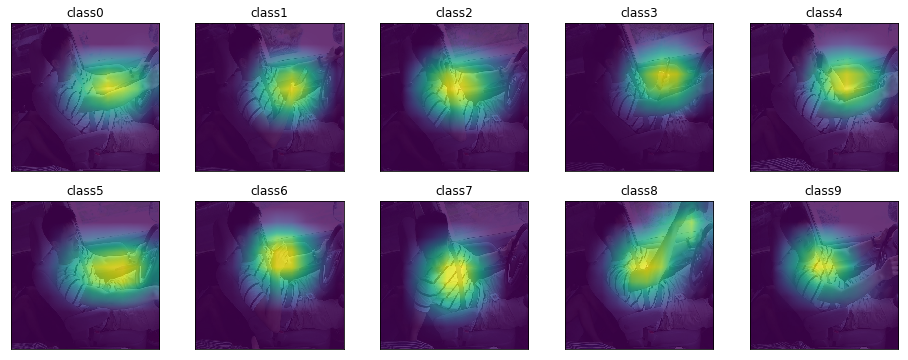

In [78]:
import cv2  
fig,axes=plt.subplots(2,5,figsize = (16,6))
for index in range(10):
    x=int(index/5)
    y=index-x*5
    file=sampleimagefile[index]
#    img = cv2.imread(file)
    # 将BGR图像转变为RGB图像以打印
#    cv_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = image.load_img(file, target_size=(299, 299))
    axes[x,y].set_xticks([])
    axes[x,y].set_yticks([])
    title='class'+str(index)
    axes[x,y].set_title(title)
    # 展示图像
    cam=newcamresult[index,:,:,index]
    cam = cv2.resize(cam, (299, 299))
    cam=cam*100
    axes[x,y].imshow(img)
    axes[x,y].imshow(cam,alpha=0.8,interpolation='nearest')